In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [61]:
hbarc=1.97e-7 #ev-m
rho = 1./1.e-15 ## nucleon/m
M=1.e9 #eV
### Box 17.2
Ev = hbarc**2*np.pi**2*rho**2/(96*M)

In [62]:
print(Ev/1.e6)

3.98989038751955


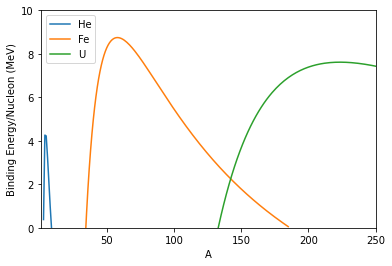

In [63]:
ev=15.56
es=17.23
ec=0.7
esym=23.28
def binding_energy(Z,N):
    A=Z+N
    B=ev*A-es*A**.6667 -ec*Z**2/A**.333-esym*(N-Z)**2/A
    ## pairing energy
    
    return B
Z=2.
N=np.arange(1.,160.,1.)
A=N+Z
plt.plot(A,binding_energy(Z,N)/(Z+N),label='He')
Z=26.
A=N+Z
plt.plot(A,binding_energy(Z,N)/(Z+N),label='Fe')
Z=92.
A=N+Z
plt.plot(A,binding_energy(Z,N)/(Z+N),label='U')
plt.legend()
plt.axis([1,250,.0,10])
plt.xlabel('A')
plt.ylabel('Binding Energy/Nucleon (MeV)')
#plt.xscale('log')
plt.savefig('../Figures/bez.png')

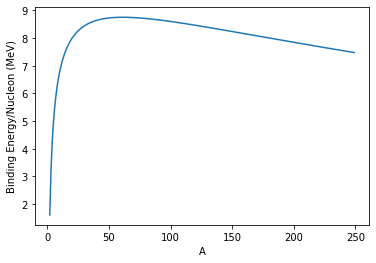

In [64]:
a=np.arange(2.,250.,1.)
zmin=.5*a/(1+.00752*a**.6667)
plt.plot(a,binding_energy(zmin,a-zmin)/a)
plt.xlabel('A')
plt.ylabel('Binding Energy/Nucleon (MeV)')
plt.savefig('../Figures/bea.png')

In [65]:
print(binding_energy(92,235-92),binding_energy(92,236-92))

1780.8228900204097 1786.812956390029


In [66]:
Q=2*binding_energy(zmin/2.,(a-zmin)/2)-binding_energy(zmin,a-zmin)

Text(0, 0.5, 'Energy released in fission')

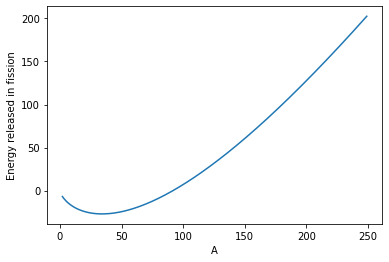

In [67]:
plt.plot(a,Q)
plt.xlabel('A')
plt.ylabel('Energy released in fission')

In [68]:
binding_energy(92,235-92)-binding_energy(56,144-56)-binding_energy(36,90-36)

-169.09242755369087

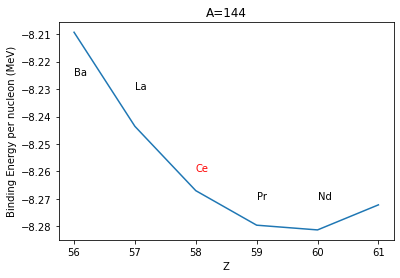

In [69]:
z=np.arange(56,62,1)
plt.plot(z,-binding_energy(z,144-z)/144)
plt.text(60,-8.27,'Nd')
plt.text(56,-8.225,'Ba')
plt.text(57,-8.23,'La')
plt.text(58,-8.26,'Ce',color='r')
plt.text(59,-8.27,'Pr')
plt.xlabel('Z')
plt.ylabel('Binding Energy per nucleon (MeV)')
plt.title('A=144')
plt.savefig('../Figures/bachain.pdf')

In [70]:
(36*3.14159)**.33333

4.835898282102767

In [71]:
np.exp(100)

2.6881171418161356e+43

In [78]:
binding_energy(92,235-92)-binding_energy(56,144-56)-binding_energy(36,90-36)-0*binding_energy(0,1)

-169.09242755369087

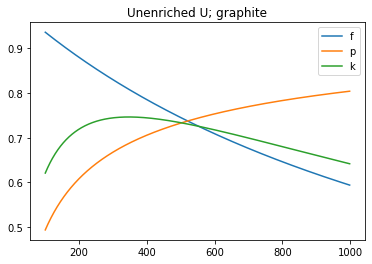

In [98]:
def eta(x):
    eta=2.42*585*x/(684*x + 2.68*(1.-x))
    return eta

def f(x,y,sigma_moderator):
    f=684*x/(684*x+sigma_moderator*y)
    return f

def p(x,y,xi,sms):
    arg=2.73/xi
    arg/= (9.3+15.1*x+y*sms)**.514
    return np.exp(-arg)

xig=.158
smsg=4.94
water=.664
heavy=.0012
graphite=.00337
x=np.arange(0.0072,.05,.001)
y=np.arange(100,1000,1.)
#plt.plot(x,eta(x),label='$\\eta$')
xnat=0.0072
farr=f(xnat,y,graphite)
plt.plot(y,farr,label='f')
parr=p(xnat,y,xig,smsg)
plt.plot(y,parr,label='p')
plt.plot(y,parr*farr*eta(xnat),label='k')
plt.title('Unenriched U; graphite')
plt.legend()

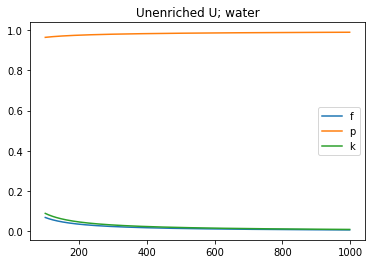

In [101]:
xiw=.92
smsw=49.2
farr=f(xnat,y,water)
plt.plot(y,farr,label='f')
parr=p(xnat,y,xiw,smsw)
plt.plot(y,parr,label='p')
plt.plot(y,parr*farr*eta(xnat),label='k')
plt.title('Unenriched U; water')
plt.legend()

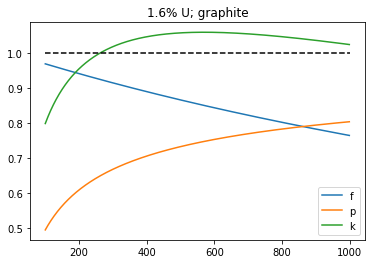

In [100]:
xe=.016
farr=f(xe,y,graphite)
plt.plot(y,farr,label='f')
parr=p(xe,y,xig,smsg)
plt.plot(y,parr,label='p')
plt.plot(y,parr*farr*eta(xe),label='k')
plt.plot([100,1000],[1,1],'--k')
plt.title('1.6% U; graphite')
plt.legend()

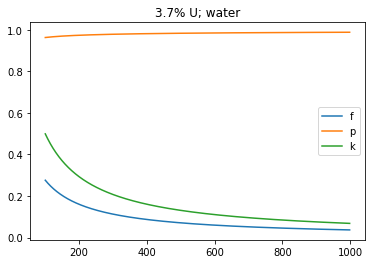

In [102]:
xiw=.92
smsw=49.2
xe=.037
farr=f(xe,y,water)
plt.plot(y,farr,label='f')
parr=p(xe,y,xiw,smsw)
plt.plot(y,parr,label='p')
plt.plot(y,parr*farr*eta(xe),label='k')
plt.title('3.7% U; water')
plt.legend()

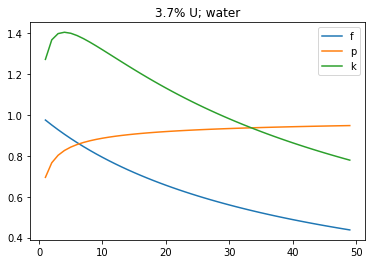

In [103]:
y=np.arange(1,50,1.)
farr=f(xe,y,water)
plt.plot(y,farr,label='f')
parr=p(xe,y,xiw,smsw)
plt.plot(y,parr,label='p')
plt.plot(y,parr*farr*eta(xe),label='k')
plt.title('3.7% U; water')
plt.legend()